# KNN Modeling Exercise

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import prepare
import acquire

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
train, validate, test = prepare.prep_titanic_data(acquire.get_titanic_data())

In [3]:
train.shape, validate.shape, test.shape

((498, 13), (214, 13), (179, 13))

In [4]:
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,583,0,1,male,36.000000,0,0,40.1250,Cherbourg,1,1,0,0
165,165,1,3,male,9.000000,0,2,20.5250,Southampton,0,1,0,1
50,50,0,3,male,7.000000,4,1,39.6875,Southampton,0,1,0,1
259,259,1,2,female,50.000000,0,1,26.0000,Southampton,0,0,0,1
306,306,1,1,female,29.678105,0,0,110.8833,Cherbourg,1,0,0,0


In [5]:
x_cols = ['pclass', 'age', 'alone', 'fare']
y_col = 'survived'

X_train, y_train = train[x_cols], train[y_col]
X_validate, y_validate = validate[x_cols], validate[y_col]
X_test, y_test = test[x_cols], test[y_col]

In [6]:
X_train.head()

,pclass,age,alone,fare
583,1,36.000000,1,40.1250
165,3,9.000000,0,20.5250
50,3,7.000000,0,39.6875
259,2,50.000000,0,26.0000
306,1,29.678105,1,110.8833


In [7]:
# knn classifier with n_neighbour = 1

knn1 = KNeighborsClassifier(1)
knn1.fit(X_train, y_train)
# get_classification_metrics(knn)
y_pred = knn1.predict(X_train)

In [8]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       307
           1       0.96      0.97      0.97       191

    accuracy                           0.97       498
   macro avg       0.97      0.97      0.97       498
weighted avg       0.97      0.97      0.97       498



In [9]:
report = classification_report(y_train, y_pred, output_dict=True)
print("n_neighbour = 1")
pd.DataFrame(report)

n_neighbour = 1


,0,1,accuracy,macro avg,weighted avg
precision,0.980392,0.963542,0.973896,0.971967,0.973929
recall,0.977199,0.968586,0.973896,0.972893,0.973896
f1-score,0.978793,0.966057,0.973896,0.972425,0.973908
support,307.000000,191.000000,0.973896,498.000000,498.000000


In [10]:
confusion_matrix(y_train, y_pred)

array([[300,   7],
       [  6, 185]])

In [11]:
print('Actual on Left, Predicted on Top')
pd.crosstab(y_train, y_pred)

Actual on Left, Predicted on Top


col_0,0,1
survived,,
0,300,7
1,6,185


In [12]:
# Lets be nicer and say that the "positive" outcome is survival = 1
TN, FP, FN, TP = confusion_matrix(y_train,y_pred).ravel()
ALL = TP + TN + FP + FN

TN, FP, FN, TP 

(300, 7, 6, 185)

In [14]:
def show_scores(TN, FP, FN, TP):
    
    ALL = TP + TN + FP + FN
    
    accuracy = (TP + TN)/ALL # How often did the model get it right?
    precision = TP/(TP+FP) # What is the quality of a positive prediction made by the model?
    recall = TP/(TP+FN) # How many of the true positives were found?   
    
    true_positive_rate = TP/(TP+FN) # Same as recall, actually
    true_negative_rate = TN/(TN+FP) # How many of the true negatives were found?
    false_positive_rate = FP/(FP+TN) # How often did we miss the negative and accidentally call it positive?
    false_negative_rate = FN/(FN+TP) # How often did we miss the positive and accidentally call it negative?
    
    f1_score = 2*(precision*recall)/(precision+recall) # Harmonic mean, good for imbalanced data sets
    support_pos = TP + FN # Number of actual positives in the sample
    support_neg = FP + TN # Number of actual negatives in the sample
    
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"True Positive Rate: {true_positive_rate}")
    print(f"True Negative Rate: {true_negative_rate}")
    print(f"False Positive Rate: {false_positive_rate}")
    print(f"False Negative Rate: {false_negative_rate}")
    print(f"F1 Score: {f1_score}")
    print(f"Support (0): {support_pos}")
    print(f"Support (1): {support_neg}")

In [15]:
show_scores(TN, FP, FN, TP)

Accuracy: 0.9738955823293173
Precision: 0.9635416666666666
Recall: 0.9685863874345549
True Positive Rate: 0.9685863874345549
True Negative Rate: 0.9771986970684039
False Positive Rate: 0.02280130293159609
False Negative Rate: 0.031413612565445025
F1 Score: 0.9660574412532636
Support (0): 191
Support (1): 307


In [16]:
# knn classifier with n_neighbour = 10

knn2 = KNeighborsClassifier(10)
knn2.fit(X_train, y_train)
y_pred = knn2.predict(X_train)

report = classification_report(y_train, y_pred, output_dict=True)
print("n_neighbour = 10")
pd.DataFrame(report)

n_neighbour = 10


,0,1,accuracy,macro avg,weighted avg
precision,0.721785,0.726496,0.722892,0.724140,0.723592
recall,0.895765,0.445026,0.722892,0.670396,0.722892
f1-score,0.799419,0.551948,0.722892,0.675683,0.704505
support,307.000000,191.000000,0.722892,498.000000,498.000000


In [17]:
# confusion_matrix
print('Actual on Left, Predicted on Top')
pd.crosstab(y_train, y_pred)

Actual on Left, Predicted on Top


col_0,0,1
survived,,
0,275,32
1,106,85


In [18]:
# knn classifier with n_neighbour = 20

knn3 = KNeighborsClassifier(20)
knn3.fit(X_train, y_train)
y_pred = knn3.predict(X_train)

report = classification_report(y_train, y_pred, output_dict=True)
print("n_neighbour = 20")
pd.DataFrame(report)

n_neighbour = 20


,0,1,accuracy,macro avg,weighted avg
precision,0.712042,0.698276,0.708835,0.705159,0.706762
recall,0.885993,0.424084,0.708835,0.655039,0.708835
f1-score,0.789550,0.527687,0.708835,0.658619,0.689117
support,307.000000,191.000000,0.708835,498.000000,498.000000


In [19]:
# confusion_matrix
print('Actual on Left, Predicted on Top')
pd.crosstab(y_train, y_pred)

Actual on Left, Predicted on Top


col_0,0,1
survived,,
0,272,35
1,110,81


## Visualize Performance as a function of k

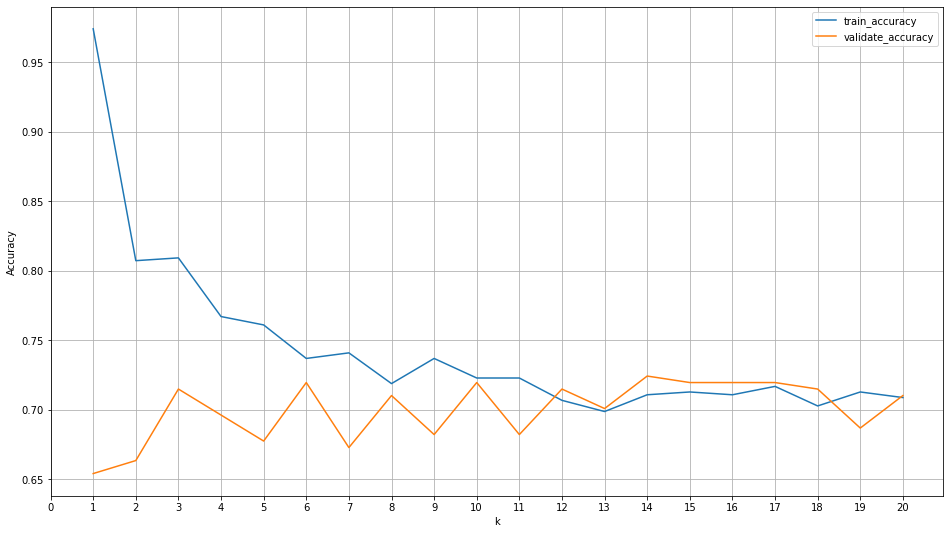

In [20]:
metrics = []

# loop through different values of k
for k in range(1, 21):
            
    # define the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the thing (remmeber only fit on training data)
    knn.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = knn.score(X_train, y_train)
    validate_accuracy = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
results = pd.DataFrame(metrics)

# plot the data
results.set_index('k').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()